# 图像特效-交叉冲印滤镜（Punch Filter）

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [5]:
def punch_filter(src):
    rmap = np.zeros((256,))
    gmap = np.zeros_like(rmap)
    bmap = np.zeros_like(rmap)
    for i in range(256):
        value = 0
        if i < 128:
            value = i
        else:
            value = 255 - i
        gray = np.round(value * value * value / 16384)
        if i < 128:
            rmap[i] = gray
        else:
            rmap[i] = 255 - gray
        gray = np.round(value * value / 128)
        if i < 128:
            gmap[i] = gray
        else:
            gmap[i] = 255 - gray
        bmap[i] = np.round(i / 2) + 0x25
    dst = np.zeros_like(src)
    dst[:,:,0] = cv2.LUT(src[:,:,0],rmap)
    dst[:,:,1] = cv2.LUT(src[:,:,1],gmap)
    dst[:,:,2] = cv2.LUT(src[:,:,2],bmap)
    
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

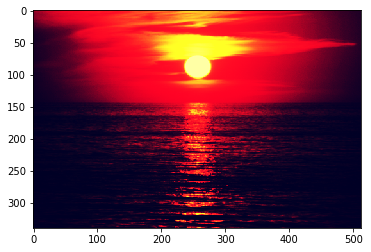

In [6]:
dst = punch_filter(rgb)
plt.imshow(dst)

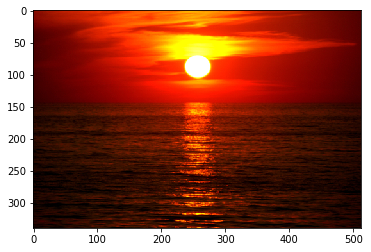

In [7]:
plt.imshow(rgb)